In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
SHOW_MODELS = ['deepconvnet', 'labram', 'labram_one', 'deepconvnet_alt_ng', 'deepconvnet_alt_ng_raw']

df_labram = pd.read_csv('data_normalized/LOMSO/labram_normal.csv')
print(df_labram.columns)
print(df_labram['model'].unique())
print(df_labram.shape)

df_deep = pd.read_csv('data_normalized/LOMSO/deep_normal.csv')
print(df_deep.columns)
print(df_deep['model'].unique())
print(df_deep.shape)

df_deep_labram_alt = pd.read_csv('data_normalized/LOMSO/labram_deep_alt.csv')
print(df_deep_labram_alt.columns)
print(df_deep_labram_alt['model'].unique())
print(df_deep_labram_alt.shape)

assert (list(df_labram.columns) == list(df_deep.columns) == list(df_deep_labram_alt.columns)), "Column mismatch between the DataFrames!"

df_labram_one = pd.read_csv('data_normalized/LOSO/labram_one.csv')
df_labram_one.loc[df_labram_one['model'] == 'labram', 'model'] = 'labram_one'
print(df_labram.columns)
print(df_labram['model'].unique())
print(df_labram.shape)

df_deep_one = pd.read_csv('data_normalized/LOSO/deepconv_alt_one.csv')
df_deep_one.loc[df_deep_one['model'] == 'deepconvnet_alt', 'model'] = 'deepconvnet_alt_ng'
print(df_deep.columns)
print(df_deep['model'].unique())
print(df_deep.shape)

df_deep_one_raw = pd.read_csv('data_normalized/LOSO/deepconv_alt_one_raw.csv')
df_deep_one_raw.loc[df_deep_one_raw['model'] == 'deepconvnet_alt_raw', 'model'] = 'deepconvnet_alt_ng_raw'
print(df_deep_one_raw.columns)
print(df_deep_one_raw['model'].unique())
print(df_deep_one_raw.shape)

df_csv = pd.concat([df_labram_one, df_deep_one, df_deep_one_raw, df_labram, df_deep_labram_alt, df_deep], ignore_index=True, sort=False)
if SHOW_MODELS:
    df_csv = df_csv[df_csv['model'].isin(SHOW_MODELS)].copy()
print(df_csv.columns)
print(df_csv.shape)
print(df_csv['model'].unique())

Index(['subject_id', 'shots', 'repetition', 'final_accuracy', 'final_loss',
       'final_accuracy_train', 'n_samples', 'n_support', 'n_query',
       'acc_train_e1',
       ...
       'epoch_time_e13', 'epoch_time_e14', 'epoch_time_e15', 'epoch_time_e16',
       'epoch_time_e17', 'epoch_time_e18', 'epoch_time_e19', 'epoch_time_e20',
       'model', 'experiment'],
      dtype='object', length=119)
['labram']
(7560, 119)
Index(['subject_id', 'shots', 'repetition', 'final_accuracy', 'final_loss',
       'final_accuracy_train', 'n_samples', 'n_support', 'n_query',
       'acc_train_e1',
       ...
       'epoch_time_e13', 'epoch_time_e14', 'epoch_time_e15', 'epoch_time_e16',
       'epoch_time_e17', 'epoch_time_e18', 'epoch_time_e19', 'epoch_time_e20',
       'model', 'experiment'],
      dtype='object', length=119)
['deepconvnet']
(7560, 119)
Index(['subject_id', 'shots', 'repetition', 'final_accuracy', 'final_loss',
       'final_accuracy_train', 'n_samples', 'n_support', 'n_query',
   

In [ ]:
ID_VARS = ['subject_id', 'model', 'experiment', 'shots', 'repetition', 'n_support', 'n_query']

EPOCHS = 20
# metric: split
# accuracy: train 
df_train = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'acc_train_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_train['split'] = 'train'
df_train['metric'] = 'accuracy'

# accuracy: test 
df_test = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'acc_test_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_test['split'] = 'test'
df_test['metric'] = 'accuracy'

# loss: support 
df_supp = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'loss_supp_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_supp['split'] = 'support'
df_supp['metric'] = 'loss'

# loss: query 
df_query = df_csv.melt(
    id_vars=ID_VARS,
    value_vars=[f'loss_q_e{i}' for i in range(1, EPOCHS+1)],
    var_name='epoch',
    value_name='value'
)
df_query['split'] = 'query'
df_query['metric'] = 'loss'

# combine
df_long = pd.concat([df_train, df_test, df_supp, df_query], ignore_index=True)
# clean epoch
df_long['epoch'] = df_long['epoch'].str.extract(r'e(\d+)').astype(int)

# reorder
df = df_long[ID_VARS + ['epoch', 'split', 'metric', 'value']].sort_values(ID_VARS + ['metric','split','epoch']).reset_index(drop=True)

print(f"Shape: {df.shape}")

print("Unique values:")
for col in ID_VARS:
    unique_vals = df[col].unique()
    n_unique = len(unique_vals)
    preview = ", ".join(map(str, unique_vals[:10]))
    print(f"  {col:<12}: {n_unique:>3} unique --> {preview}")
print(f"Splits: {df['split'].unique().tolist()}")
print(f"Metrics: {df['metric'].unique().tolist()}")
print(df.columns)
print(df.head())

Shape: (2548800, 11)
Unique values:
  subject_id  :  54 unique --> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
  model       :   5 unique --> deepconvnet, deepconvnet_alt_ng, deepconvnet_alt_ng_raw, labram, labram_one
  experiment  : 162 unique --> deepconvnet_lomso_fold005_test1-9, test_subject_1_model_f28, labram_lomso_fold005_test1-9, labram_lomso_fold001_test1, deepconvnet_lomso_fold015_test2-46, test_subject_2_model_f44, labram_lomso_fold015_test2-46, labram_lomso_fold002_test2, deepconvnet_lomso_fold011_test3-54, test_subject_3_model_f38
  shots       :  14 unique --> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
  repetition  :  10 unique --> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
  n_support   :  14 unique --> 0, 2, 4, 6, 8, 10, 12, 14, 16, 18
  n_query     :  14 unique --> 400, 398, 396, 394, 392, 390, 388, 386, 384, 382
Splits: ['test', 'train', 'query', 'support']
Metrics: ['accuracy', 'loss']
Index(['subject_id', 'model', 'experiment', 'shots', 'repetition', 'n_support',
       'n_query', 'epoch', 'split', 'metric

### Best epoch approach

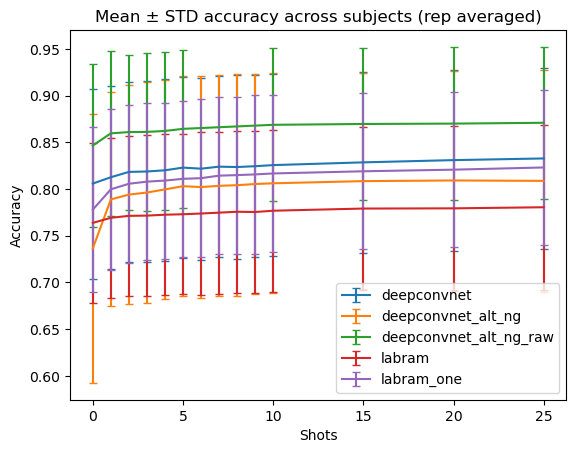

In [ ]:
df_acc = df[(df['split'] == 'test') & (df['metric'] == 'accuracy')]

# Average over repetitions first
df_mean_rep = df_acc.groupby(['subject_id', 'model', 'shots', 'epoch'], as_index=False)['value'].mean()


# Choose best epoch per subject/model/shot
best_epochs = df_mean_rep.loc[df_mean_rep.groupby(['subject_id', 'model', 'shots'])['value'].idxmax()]

# Aggregate across subjects
summary = best_epochs.groupby(['shots', 'model'])['value'].agg(['mean', 'std']).reset_index()

for model, g in summary.groupby('model'):
    plt.errorbar(g['shots'], g['mean'], yerr=g['std'], label=model, capsize=3)

plt.xlabel('Shots')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Mean ± STD accuracy across subjects (rep averaged)')
plt.show()

### Predefined epochs approach
We evaluate model performance using a **rule-based selection of adaptation epochs** per number of shots.
The goal is to avoid test-set tuning while still

In [ ]:
rule_based_epochs = {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 15:7, 20:9, 25:9}

df_acc = df[(df['split']=='test') & (df['metric']=='accuracy')]

# Average over repetitions first
df_mean_rep = df_acc.groupby(['subject_id','model','shots','epoch'], as_index=False)['value'].mean()

# Apply per-shot epoch rule
df_selected = pd.concat([
    df_mean_rep[(df_mean_rep['shots']==s) & (df_mean_rep['epoch']==e)]
    for s, e in rule_based_epochs.items() if s in df_mean_rep['shots'].unique()
])

print(df_selected.head())


      subject_id                   model  shots  epoch   value
0              1             deepconvnet      0      1  0.8725
280            1      deepconvnet_alt_ng      0      1  0.8150
560            1  deepconvnet_alt_ng_raw      0      1  0.8600
760            1                  labram      0      1  0.7425
1040           1              labram_one      0      1  0.7725


#### Aggregate across subjects

Here we compute **mean and standard deviation of accuracy across all subjects** for each model and shot count.
The error-bar plot summarizes group-level performance trends.
- **x-axis:** number of shots (support trials per subject)
- **y-axis:** test accuracy
- **error bars:** inter-subject variability (±1 SD)

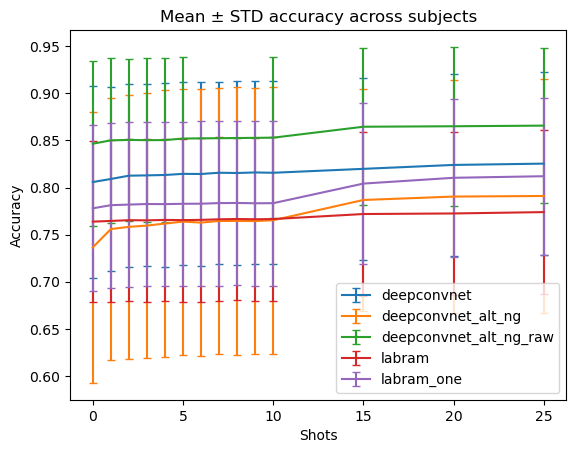

In [ ]:
# Aggregate across subjects
summary = df_selected.groupby(['shots', 'model'])['value'].agg(['mean', 'std']).reset_index()

for model, g in summary.groupby('model'):
    plt.errorbar(g['shots'], g['mean'], yerr=g['std'], label=model, capsize=3)

plt.xlabel('Shots')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Mean ± STD accuracy across subjects')
plt.show()

#### Per-subject trajectories
This plot shows **how each subject’s accuracy changes with increasing shots**, overlaid for all subjects.
The transparent lines correspond to individual subjects, while the bold line shows the **average trend**.
This helps visualize **subject-level variability** and consistency of few-shot adaptation.


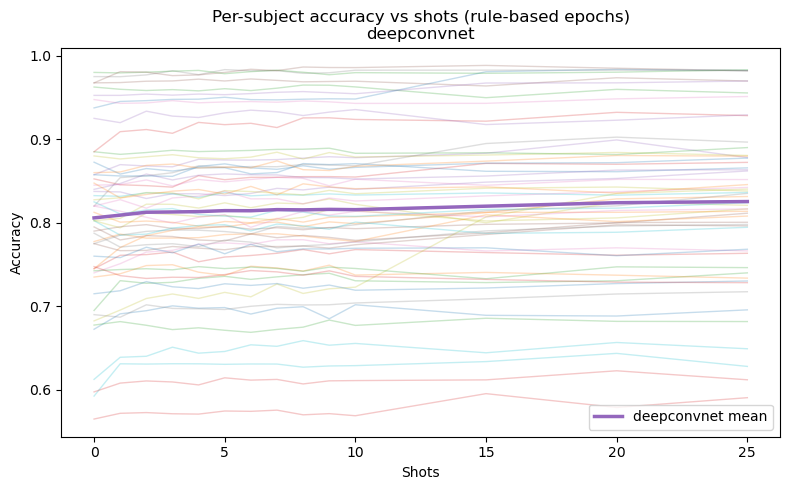

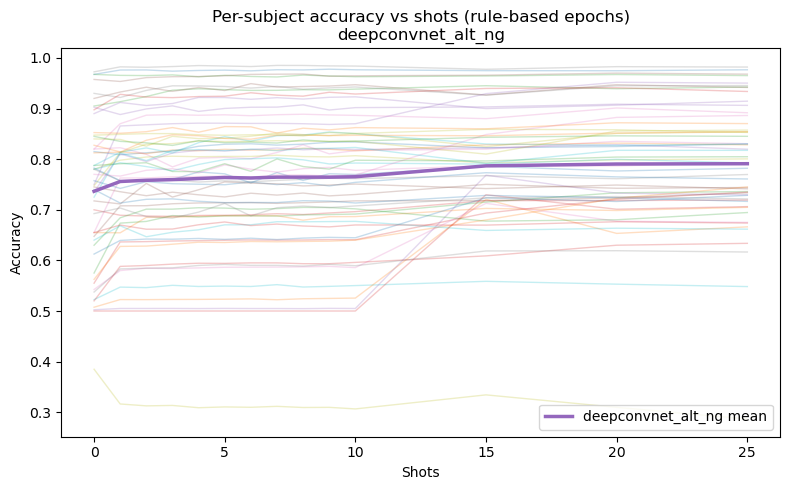

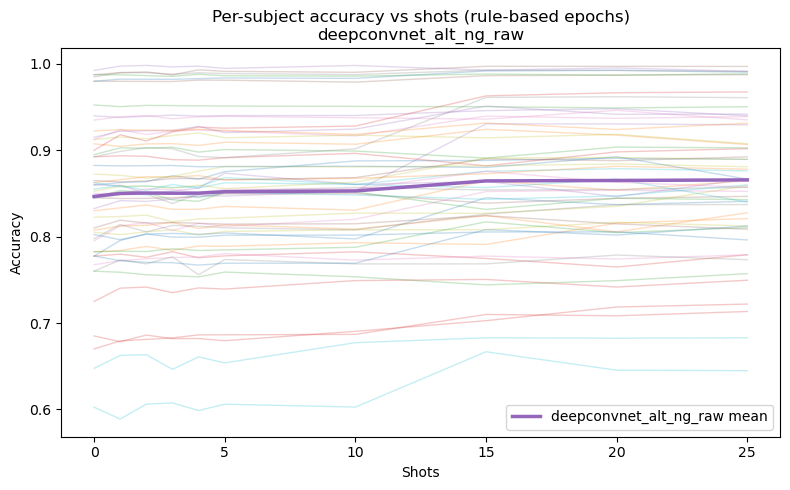

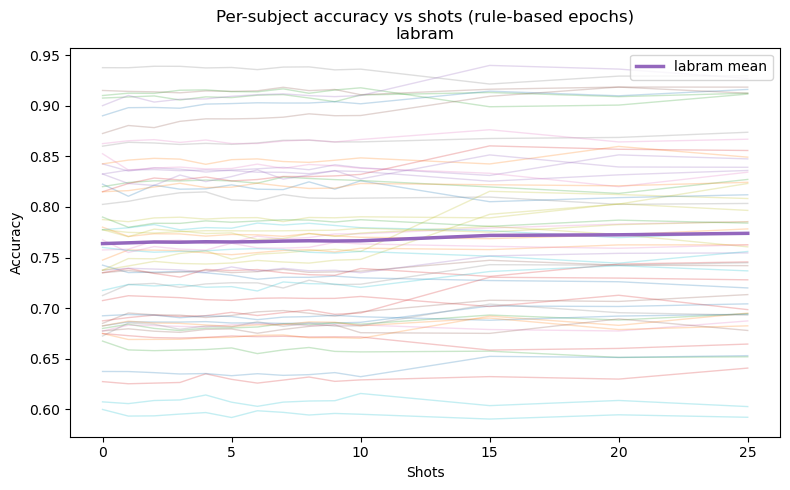

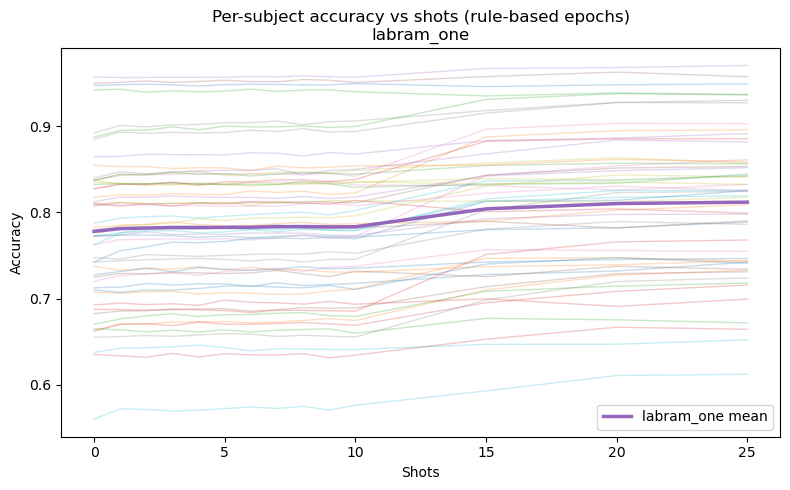

In [ ]:

for model, g in df_selected.groupby('model'):
    plt.figure(figsize=(8,5))
    # one line per subject
    for sid, gs in g.groupby('subject_id'):
        gs = gs.sort_values('shots')
        plt.plot(gs['shots'], gs['value'], alpha=0.25, linewidth=1)
    # mean curve across subjects
    gm = g.groupby('shots')['value'].mean().reset_index().sort_values('shots')
    plt.plot(gm['shots'], gm['value'], linewidth=2.5, label=f'{model} mean')
    plt.title(f'Per-subject accuracy vs shots (rule-based epochs)\n{model}')
    plt.xlabel('Shots')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subject-level grid
Here we visualize **accuracy vs shots for each individual subject**, arranged in a grid.
Each subplot corresponds to one subject:
- **x-axis:** number of shots
- **y-axis:** test accuracy
- **lines:** different models compared under the same rule-based epoch schedule

This view highlights inter-subject differences in adaptation behavior and model robustness.


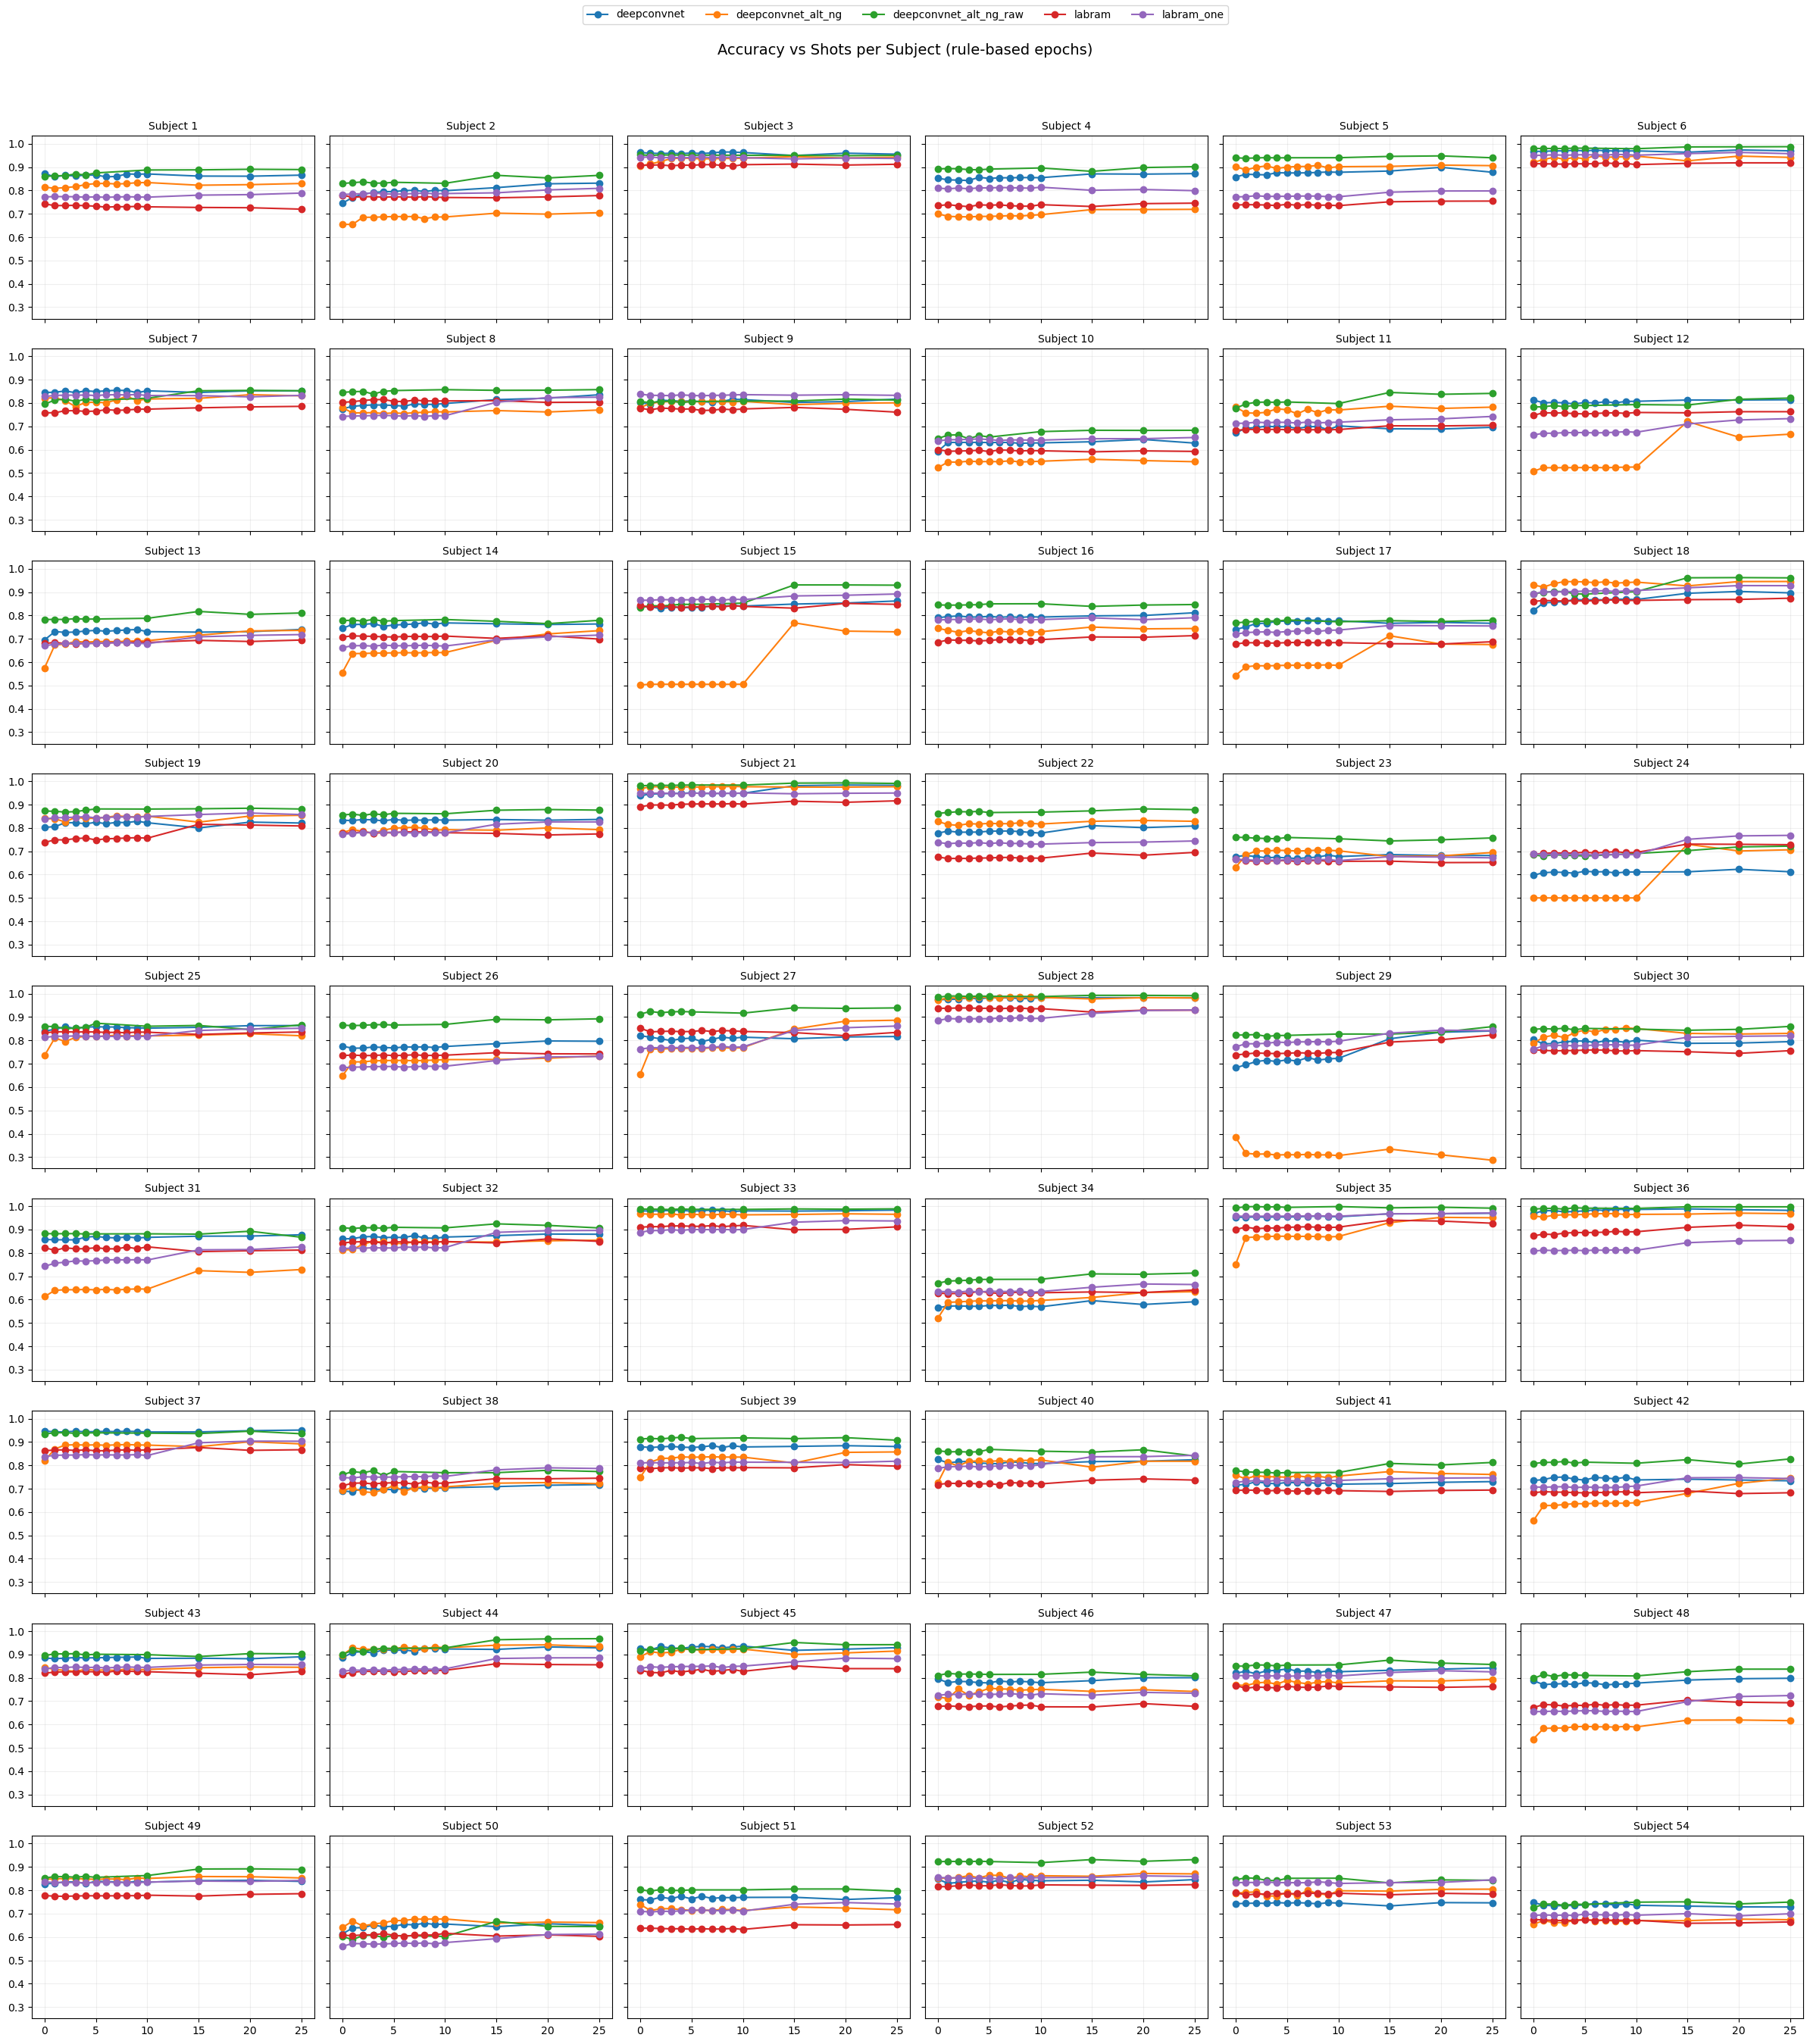

In [ ]:
# df_selected: ['subject_id', 'model', 'shots', 'epoch', 'value']
subjects = sorted(df_selected['subject_id'].unique())
models = sorted(df_selected['model'].unique())
n_subj = len(subjects)

# grid layout
cols = 6
rows = math.ceil(n_subj / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, sid in enumerate(subjects):
    ax = axes[i]
    g = df_selected[df_selected['subject_id'] == sid]
    for model in models:
        gm = g[g['model'] == model].sort_values('shots')
        ax.plot(gm['shots'], gm['value'], marker='o', label=model)
    ax.set_title(f'Subject {sid}', fontsize=10)
    ax.grid(alpha=0.2)

# global legend and layout
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(models))
fig.suptitle('Accuracy vs Shots per Subject (rule-based epochs)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Model robustness: good vs bad subjects

We split subjects by overall difficulty (mean accuracy across all models) into *good* and *bad* groups.  
The boxplot below compares model performance between these two groups to assess robustness.


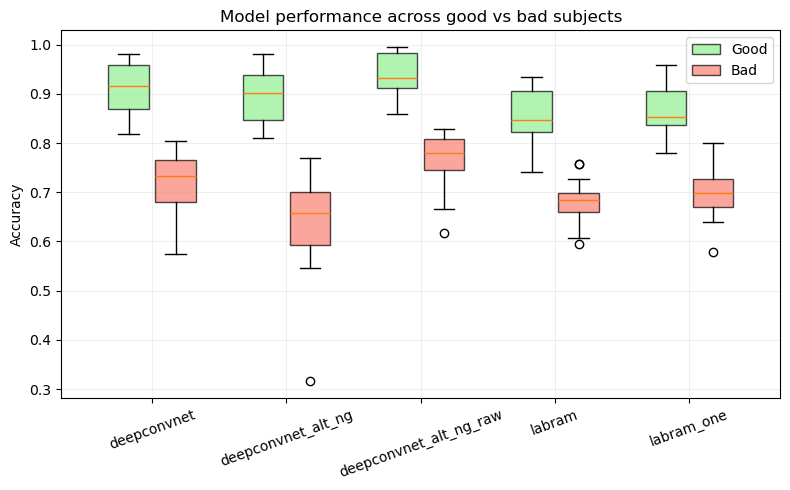

In [ ]:
# Compute per-subject mean across all models and shots
subj_global = (
    df_selected.groupby('subject_id')['value']
    .mean()
    .reset_index(name='mean_acc_all_models')
)

# Split subjects globally
thr_high = subj_global['mean_acc_all_models'].quantile(0.66)
thr_low  = subj_global['mean_acc_all_models'].quantile(0.33)

subj_global['group'] = np.where(subj_global['mean_acc_all_models'] >= thr_high, 'good',
                       np.where(subj_global['mean_acc_all_models'] <= thr_low, 'bad', 'medium'))

# Merge group label back to df
df_labeled = df_selected.merge(subj_global[['subject_id','group']], on='subject_id')

df_box = (
    df_labeled[df_labeled['group'].isin(['good','bad'])]
    .groupby(['subject_id','model','group'], as_index=False)['value']
    .mean()
)



groups = ['good', 'bad']
models = sorted(df_box['model'].unique())
grouped_data = {g: [df_box[(df_box['model']==m) & (df_box['group']==g)]['value']
                    for m in models] for g in groups}

# spacing
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

# plot good and bad side by side
b1 = ax.boxplot(grouped_data['good'], positions=x - width/2, widths=0.3, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
b2 = ax.boxplot(grouped_data['bad'], positions=x + width/2, widths=0.3, patch_artist=True,
                boxprops=dict(facecolor='salmon', alpha=0.7))

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylabel('Accuracy')
ax.set_title('Model performance across good vs bad subjects')
ax.legend([b1["boxes"][0], b2["boxes"][0]], ['Good', 'Bad'], loc='upper right')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()